In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 10

In [2]:
np.random.seed(42)

X = 0.4 * np.random.rand(200, 1)
y = 4 + 3 * X**(1/5) + np.random.rand(200, 1)

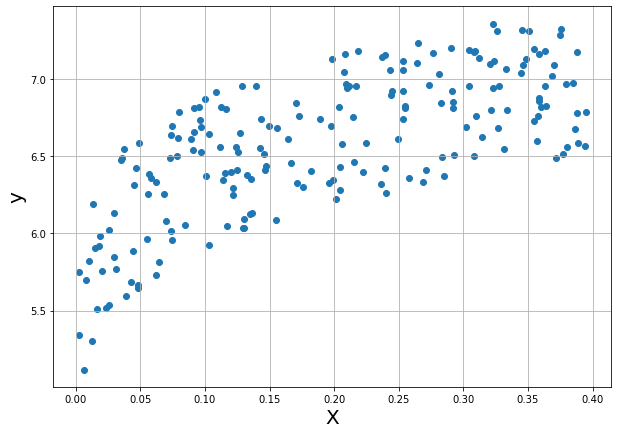

In [3]:
plt.scatter(X, y)
plt.ylabel('y', fontsize=20)
plt.xlabel('X', fontsize=20)

plt.grid(True)

plt.show()

### Linear regression models

#### Normal Equation formula:  
 
 $\hat\theta = (X^TX)^{-1}y$
 
It allows to define theta. In the following snippet of code `theta` is array of two parameters: $\theta_{0}$ and $\theta_{1}$
Hereinafter, `prediction` array will store two values - $y$'s for plotting the graph x of y

In [4]:
def NormalEquation(X, y):
    X_b = np.c_[np.ones(X.size), X]
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)
    prediction = np.dot(np.c_[np.ones((2, 1)), np.array([[np.min(X)], [np.max(X)]])], theta)
    return theta, prediction

In [5]:
ne_theta, ne_prediction = NormalEquation(X, y)
print("Normal Equation theta: \t\t", ne_theta.flatten())
print("Normal Eqaution prediction:\t", ne_prediction.flatten())

Normal Equation theta: 		 [6.03330075 2.75739483]
Normal Eqaution prediction:	 [6.03939142 7.12179553]


#### Gradient Descent

For educational purposes I'll compare 3 most common types of gradient descent algorithm: Batch Gradient Descent, Stochastic Gradient Descent and Mini-Batch Gradient Descent

<h4><center>Batch Gradient Descent</center></h4>

To compute partial derivative, that is later will be used for calculating $\theta$ - the following formula is used:
$$ \frac{\partial}{\partial \theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m} (\theta^Tx^{(i)} - y^{(i)})x^{(i)}_{j}$$

Since Batch gradient descent requires finding gradient vectors for every single feature, it's better use another simplified formula:
$$ \nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T(X\theta - y)$$

<h4><center>Stochastic Gradient Descent</center></h4>
The core prinicple of this method is computing gradient for random value of array of given feature vectors. For better adjustment there are 3 hyperparameters controlling output of the algorithm: `t0`, `t1` and `epochs`

First two are used for determining value used as $\alpha$ in Batch Gradient Descent. Here it is learning schedule: 
$$learning\ schedule = \frac{t_{0}}{epoch * m + i + t_{1}}\ ,$$
where epoch m is size of feature vector, i - number of iteration over the size of vector

<h4><center>Mini-batch Gradient Descent</center></h4>
This one is some sort of trafeoff between BGD and SGD: it implies using a small batch of data, not the whole array of features, and iterating randomly over this batch.

All three methods can be choosed in `GradientDescent` class by specifying `mode` parameter. By default, Batch Gradient Descent is set

In [6]:
class GradientDescent():
    def __init__(self, alpha=0.01, mode='batch', iterations=1000, threshold=1, epochs=200, t0=70, t1=75):
        self.mode = mode
        self.threshold = threshold
        self.epochs = epochs
        self.alpha = alpha
        self.iterations = iterations
        self.t0 = t0
        self.t1 = t1
        
    def fit(self, X, y):
        X_b = np.c_[np.ones(X.size), X]
        X_size = X.size
        np.random.seed(42)
        theta = np.random.randn(2, 1)
        if self.mode == 'batch':           
            for itera in range(self.iterations):
                gradients = 2/X_size * X_b.T.dot(np.dot(X_b, theta) - y)
                theta = theta - self.alpha*gradients 
        
        if self.mode == 'stochastic':
            for epoch in range(self.epochs):
                for m in range(X_size):
                    random_index = np.random.randint(X_size)
                    X_random = X_b[random_index:random_index+1]
                    y_random = y[random_index:random_index+1]
                    gradients = 2/X_size * X_random.T.dot(np.dot(X_random, theta) - y_random)
                    theta = theta - (self.t0/((epoch*X_size+m)+self.t1))*gradients
        if self.mode == 'mini-batch':
            rand_size = int(self.threshold*X_size)
            for epoch in range(self.epochs):
                X_b = X_b[np.random.randint(low=0, high=rand_size, size=rand_size)]
                y_b = y[np.random.randint(low=0, high=rand_size, size=rand_size)]
                for m in range(X_b.size):
                    gradients = 2/X_b.size * X_b.T.dot(np.dot(X_b, theta) - y_b)
                    theta = theta - self.alpha*gradients
                                
        return theta   
            
    def predict(self, X, y):
        return np.dot(np.c_[np.ones((2, 1)), np.array([[np.min(X)], [np.max(X)]])], self.fit(X, y))       

Mean Squared Error also printed out in sake of comparison

In [7]:
batch_gd = GradientDescent()
batch_mse = np.sum(y - np.dot(np.c_[np.ones(X.size), X], batch_gd.fit(X, y)))**2/X.size
batch_predict = batch_gd.predict(X, y)

stoch_gd = GradientDescent(mode='stochastic', epochs=100)
stoch_mse = np.sum(y - np.dot(np.c_[np.ones(X.size), X], stoch_gd.fit(X, y)))**2/X.size
stoch_predict = stoch_gd.predict(X, y)

mini_batch_gd = GradientDescent(mode='mini-batch', threshold=0.3)
mini_batch_mse = np.sum(y - np.dot(np.c_[np.ones(X.size), X], mini_batch_gd.fit(X, y)))**2/X.size
mini_batch_predict = mini_batch_gd.predict(X, y)

print(batch_mse)
print(stoch_mse)
print(mini_batch_mse)

0.002438535132908333
1.9253076850535344
1.7297011796019504


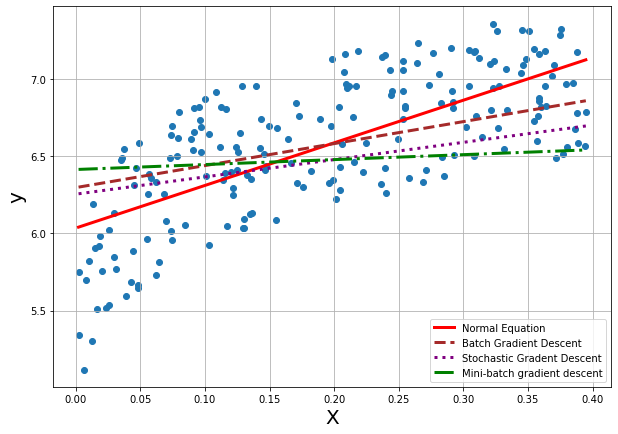

In [8]:
plt.scatter(X, y)
plt.ylabel('y', fontsize=20)
plt.xlabel('X', fontsize=20)

plt.plot([min(X), max(X)], ne_prediction, c='r', linestyle='solid', linewidth=3)
plt.plot([min(X), max(X)], batch_predict, c='brown', linestyle='dashed', linewidth=3) 
plt.plot([min(X), max(X)], stoch_predict, c='purple', linestyle='dotted', linewidth=3) 
plt.plot([min(X), max(X)], mini_batch_predict, c='g', linestyle='dashdot', linewidth=3)

plt.legend(['Normal Equation', 'Batch Gradient Descent', 'Stochastic Gradent Descent', 'Mini-batch gradient descent'], loc=4)
plt.grid(True)

plt.show()